<a href="https://colab.research.google.com/github/Matthew0803/Machine-Learning-/blob/main/Google%20Colab/linear_regression_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data = pd.read_csv('U4_01_housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
data['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

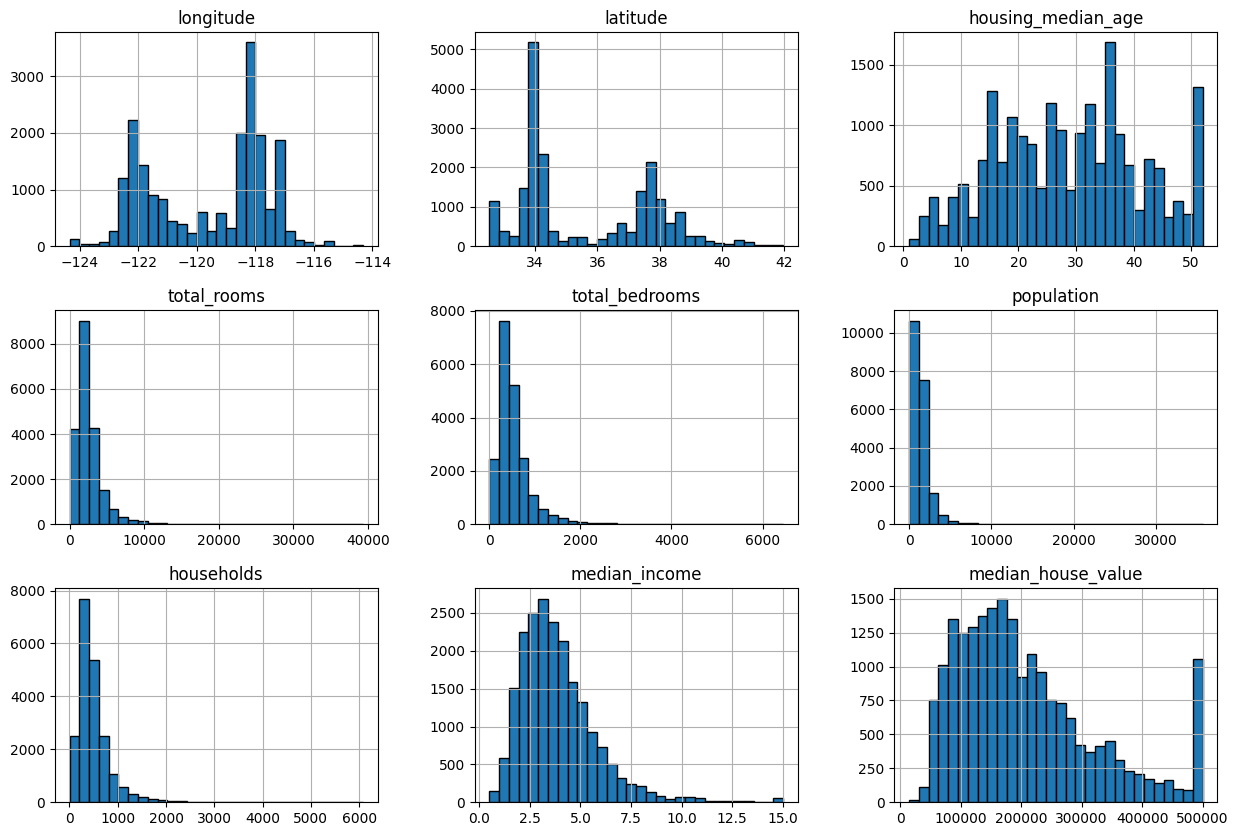

In [ ]:
data.hist(figsize=(15,10),bins=30,edgecolor='black')

<Axes: xlabel='latitude', ylabel='longitude'>

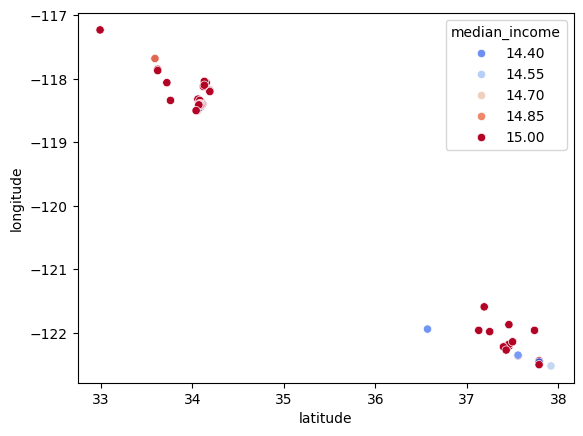

In [ ]:
import seaborn as sns
sns.scatterplot(x='latitude',y='longitude',data=data[data.median_income>14],
        hue='median_income',palette='coolwarm',)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
data_new = data.dropna()
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [ ]:
#convert catergorial to numerical
data_new['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9034
INLAND,6496
NEAR OCEAN,2628
NEAR BAY,2270
ISLAND,5


In [ ]:
#dummies solution
#only give 0/1 instead of numerical weighing
dummies = pd.get_dummies(data_new['ocean_proximity'],dtype = int)

In [ ]:
data_new = data_new.merge(dummies,left_index=True,right_index=True)
data_new.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0


In [ ]:
data_new.drop('ocean_proximity',axis=1,inplace=True)
data_new.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


<Axes: >

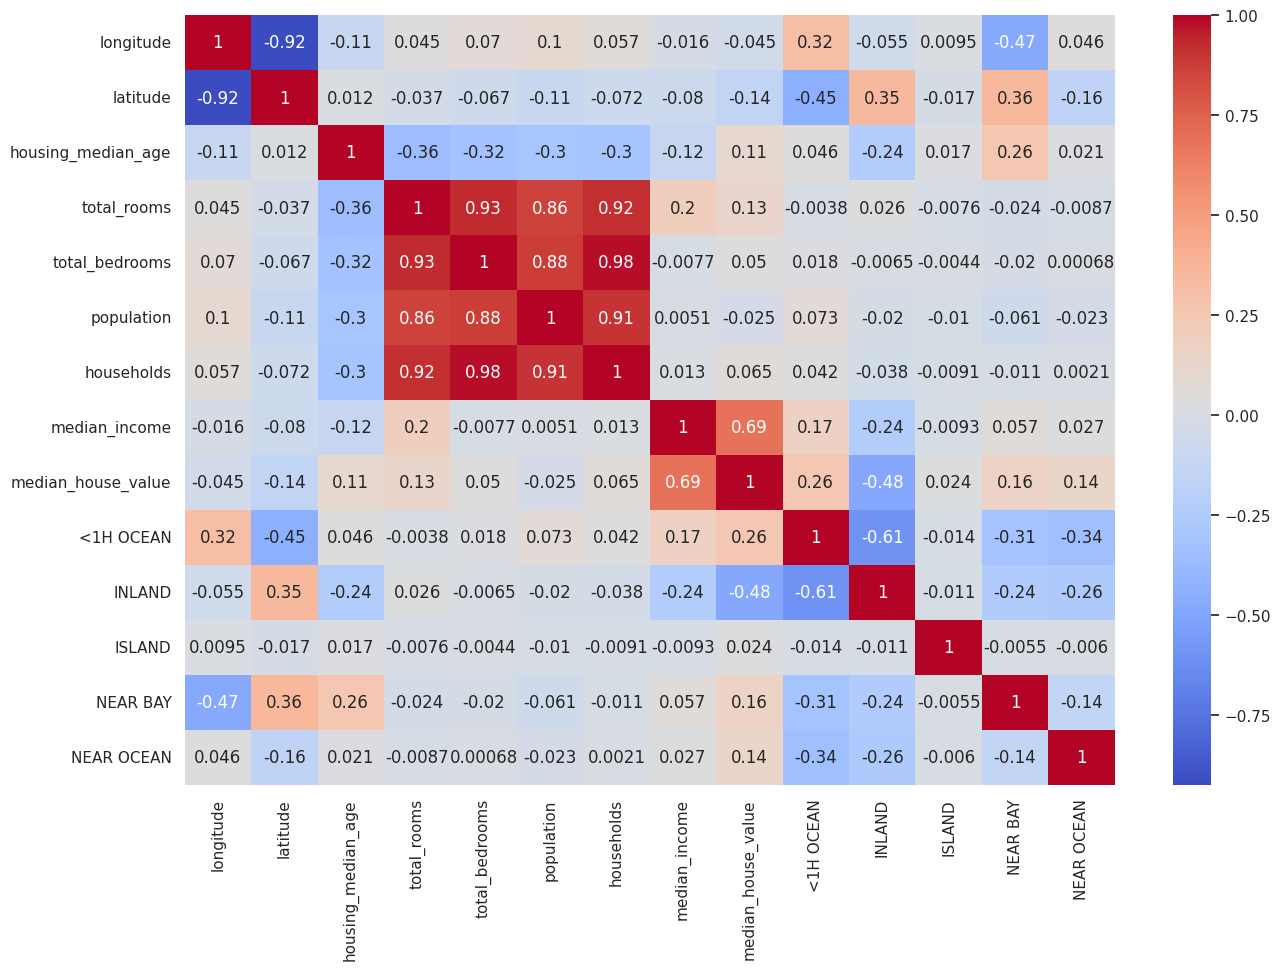

In [ ]:
#analysis, new features
correlation = data_new.corr()
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(correlation,annot=True,cmap='coolwarm')

In [ ]:
data_new.corr()["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688355
<1H OCEAN,0.257614
NEAR BAY,0.160526
NEAR OCEAN,0.140378
total_rooms,0.133294
housing_median_age,0.106432
households,0.064894
total_bedrooms,0.049686
ISLAND,0.023525


<Axes: xlabel='median_income', ylabel='median_house_value'>

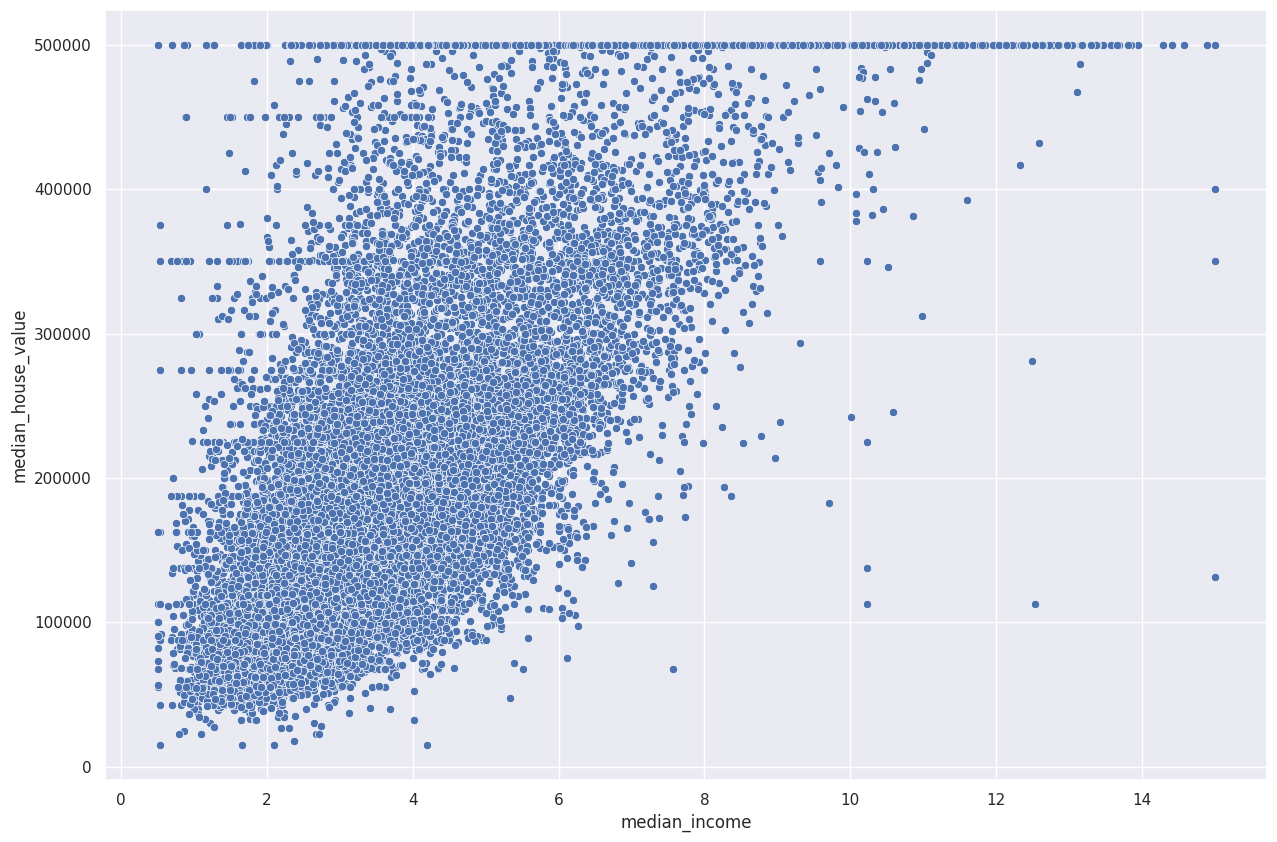

In [ ]:
sns.scatterplot(x='median_income',y='median_house_value',data=data_new)

In [ ]:
data_new["bedroom_ratio"] = data_new["total_bedrooms"]/data_new["total_rooms"]

In [ ]:
#seperate characteristics of the label
x=data_new.drop(['median_house_value'],axis=1)
y=data_new['median_house_value']

In [ ]:
#seperate data in 2 parts:training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(16346, 14) (4087, 14) (16346,) (4087,)


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
predictions = model.predict(x_test)

In [ ]:
comparsion = {'Prediction':predictions,'Real Value':y_test}
pd.DataFrame(comparsion)
#comparison

,Prediction,Real Value
13615,91644.017239,87500.0
17099,342512.672313,343500.0
9807,302433.679472,386500.0
1140,60738.365667,83800.0
3391,216907.090668,172600.0
...,...,...
18439,293270.613551,237400.0
20094,127147.052676,132500.0
13230,242417.131249,392900.0
12914,119966.134974,190200.0


In [ ]:
#score
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

0.6526412051943417
0.6492864146634064


In [ ]:
#error
from sklearn.metrics import mean_squared_error as mean_square_error
import numpy as np
mse = mean_square_error(y_test,predictions)
rmse = np.sqrt(mse)
print(rmse)

NameError: name 'y_test' is not defined

In [ ]:
#scalar check
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)
pd.DataFrame(x_train_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.151512,-0.699787,0.821805,0.398255,0.490013,0.715403,0.570504,-0.906628,-0.892336,1.469234,-0.013549,-0.352872,-0.385198,-0.018194
1,-1.337555,0.858342,0.584168,0.927598,0.570355,0.713666,0.892656,1.165407,-0.892336,-0.680627,-0.013549,-0.352872,2.596071,-0.798264
2,-1.182613,0.451264,-0.287168,-0.201515,-0.441009,-0.703873,-0.536247,0.621020,-0.892336,-0.680627,-0.013549,-0.352872,2.596071,-0.906043
3,-1.012677,1.925169,-0.920867,-0.453692,-0.495358,-0.592694,-0.408944,-0.780064,-0.892336,1.469234,-0.013549,-0.352872,-0.385198,-0.218311
4,0.606716,-0.662354,1.059443,-0.714047,-0.755288,-0.545790,-0.715509,-0.064348,1.120654,-0.680627,-0.013549,-0.352872,-0.385198,-0.140343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4082,-1.132632,0.755403,-0.445593,-0.046120,-0.358304,-0.117575,-0.302426,1.067258,1.120654,-0.680627,-0.013549,-0.352872,-0.385198,-1.039904
4083,-0.232969,1.199914,-0.207956,1.981286,1.933807,-0.882803,-0.811635,-0.913158,-0.892336,1.469234,-0.013549,-0.352872,-0.385198,-0.331912
4084,0.961583,-0.690428,-1.000079,0.114273,-0.320496,-0.232229,-0.318014,1.349063,-0.892336,1.469234,-0.013549,-0.352872,-0.385198,-1.264086
4085,-0.877727,1.396435,-0.524805,0.571371,0.721587,0.380127,0.679620,-0.574156,-0.892336,1.469234,-0.013549,-0.352872,-0.385198,0.057259
